# Sales Prediction using Linear Regression

The data scientists have collected sales data for 1559 products across 10 stores in different cities. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers to find out the properties of any product or store, which play a key role in increasing the overall sales.

In [1]:
# Import Necessary Library used in Project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Library Version
print("NumPy : {}" .format(np.__version__))
print("Pandas : {}" .format(pd.__version__))
print("Matplotlib : {}" .format(matplotlib.__version__))
print("Seaborn : {}" .format(sns.__version__))

NumPy : 1.15.4
Pandas : 0.23.4
Matplotlib : 3.0.1
Seaborn : 0.9.0


In [4]:
# Read Training and Test Dataset
training_set = pd.read_csv('Train_UWu5bXk.csv')
test_set = pd.read_csv('Test_u94Q5KV.csv')

In [5]:
# Copy Original Dataset
train_set = training_set.copy()
validation_set = test_set.copy()

In [6]:
# Print Metadata from Training Set - Structure of Dataset
print(training_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


In [7]:
# No. of Rows and Columns
print(training_set.shape)

(8523, 12)


In [8]:
# Structure of Test Dataset
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [9]:
# create Item_Outlet_Sales column in Test Dataset with Null Values, so that we can combine Training and Test Dataset
# for Data Analysis
test_set['Item_Outlet_Sales'] = np.nan
test_set.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# Combine / Append Training and Test Dataset
combine_set = training_set.append(test_set)
combine_set.shape

(14204, 12)

# Univariate Analysis

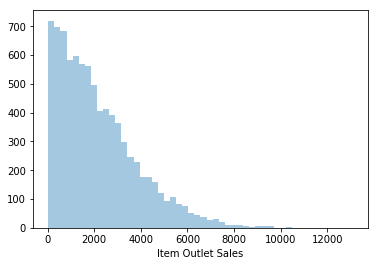

In [13]:
# Target Variable
sns.distplot(train_set['Item_Outlet_Sales'], bins=50,axlabel='Item Outlet Sales', kde=False)

Observation:-
- Right Skwed Data ( Not Normally Distributed ) Need some Transformation
- Hence Mean < Median

Numeric Independent Variables

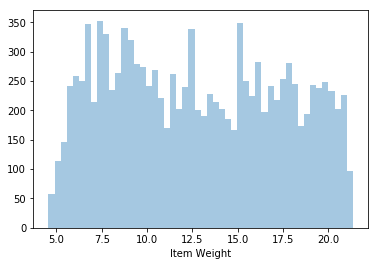

In [14]:
# Item_Weight Histogram
sns.distplot(combine_set['Item_Weight'], bins=50, axlabel='Item Weight', kde=False)

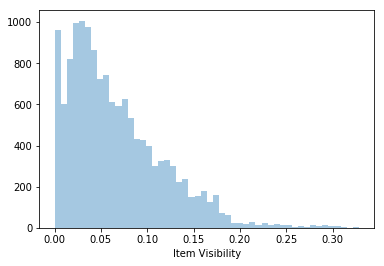

In [15]:
# Item_Visibility Histogram
sns.distplot(combine_set['Item_Visibility'], bins=50, axlabel='Item Visibility', kde=False)

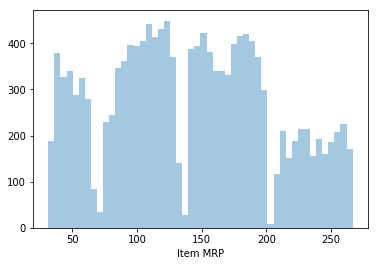

In [16]:
# Item_MRP Histogram
sns.distplot(combine_set['Item_MRP'], bins=50, axlabel='Item MRP', kde=False)

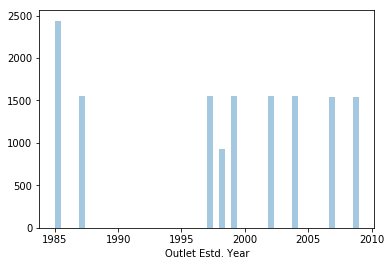

In [17]:
# Outlet_Establishment_Year Histogram
sns.distplot(combine_set['Outlet_Establishment_Year'], bins=50, axlabel='Outlet Estd. Year', kde=False)

Observations:
- There is no any kind of pattern in Item_Weight.
- Item_Visibility is Right Skewed. Needs some Transformations.
- In Item_MRP, there are four Segments.
- Outlet Establishment Year has no interesting pattern.

Categorical Independent Variables

In [18]:
print(combine_set['Item_Fat_Content'].nunique())
print(combine_set['Item_Fat_Content'].unique())

5
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [20]:
# Frequency Table for Item_Fat_Content
fat_counts = combine_set['Item_Fat_Content'].value_counts()
fat_counts

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

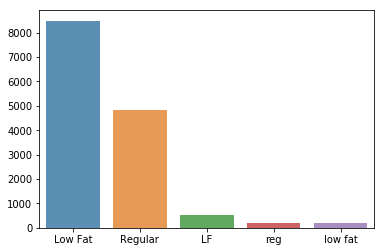

In [21]:
# Ploting Item_Fat_Content Frequency Table
sns.barplot(fat_counts.index, fat_counts.values, alpha=0.8)

Observation:
- ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one

In [22]:
# In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. 
# Similarly we can be done for ‘reg’ and ‘Regular’ into one.
combine_set.loc[combine_set['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
combine_set.loc[combine_set['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
combine_set.loc[combine_set['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
#df[ (df.A=='blue') & (df.B=='red') & (df.C=='square') ]['D'] = 'succeed'

In [23]:
# Updated Frequency Table for Item_Fat_Content
fat_counts = combine_set['Item_Fat_Content'].value_counts()
fat_counts

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

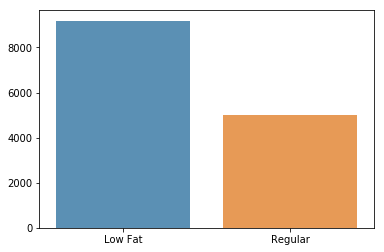

In [24]:
# Ploting Item_Fat_Content Frequency Table after Update
sns.barplot(fat_counts.index, fat_counts.values, alpha=0.8)

In [25]:
# Check for Null Values
combine_set['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [26]:
len(combine_set['Item_Type'].unique())

16

In [27]:
item_type_counts = combine_set['Item_Type'].value_counts()
item_type_counts

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [28]:
item_type_counts.count()

16

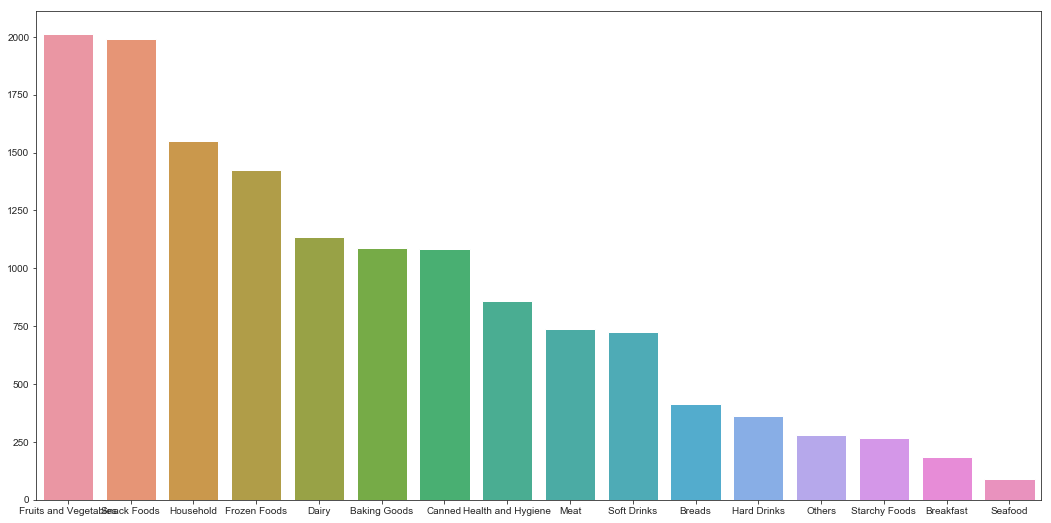

In [29]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
fig.set_size_inches(18, 9)
sns.barplot(item_type_counts.index, item_type_counts.values)

In [30]:
combine_set['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
len (combine_set['Outlet_Identifier'].unique() )

10

In [32]:
outlet_id_counts = combine_set['Outlet_Identifier'].value_counts()
outlet_id_counts

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [32]:
outlet_id_counts.count()

10

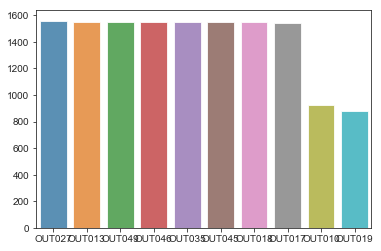

In [33]:
#fig, axe = plt.subplots()
#fig.set_size_inches(10,5)
sns.barplot(outlet_id_counts.index, outlet_id_counts.values, alpha=0.8)

In [34]:
combine_set['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [35]:
len(combine_set['Outlet_Establishment_Year'].unique())

9

In [36]:
outlet_estd_year_counts = combine_set['Outlet_Establishment_Year'].value_counts()
outlet_estd_year_counts

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
outlet_estd_year_counts.count()

9

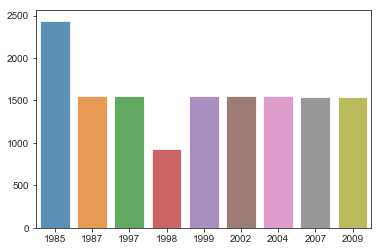

In [38]:
# Outlet Establishment Year
sns.barplot(outlet_estd_year_counts.index, outlet_estd_year_counts.values, alpha=0.8)

In [39]:
combine_set['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [40]:
len( combine_set['Outlet_Type'].unique() )

4

In [41]:
# Outlet_Type
outlet_type_counts = combine_set['Outlet_Type'].value_counts()
outlet_type_counts

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [42]:
outlet_type_counts.count()

4

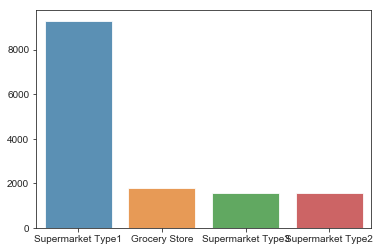

In [43]:
sns.barplot(outlet_type_counts.index, outlet_type_counts.values, alpha=0.8)

In [44]:
combine_set['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [45]:
len( combine_set['Outlet_Size'].unique() )

4

In [46]:
outlet_size_counts = combine_set['Outlet_Size'].value_counts()
outlet_size_counts

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [47]:
outlet_size_counts.count()

3

Observation:
- One Outlet size value is missing as value_counts() shows 3, but have 4 categories in unique().

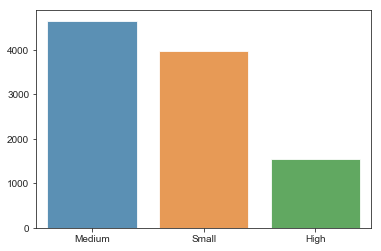

In [48]:
sns.barplot(outlet_size_counts.index, outlet_size_counts.values, alpha=0.8)

In [49]:
train_split = combine_set[:train_set.shape[0]]
train_split.shape

(8523, 12)

# Bivariate Analysis

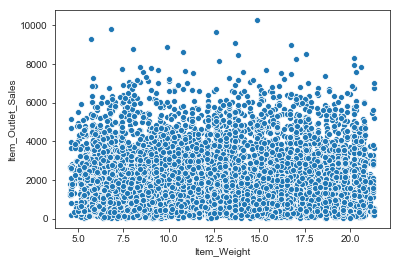

In [50]:
# Item_weight Vs Item_Outlet_Sales
sns.scatterplot(train_split['Item_Weight'], train_split['Item_Outlet_Sales'])

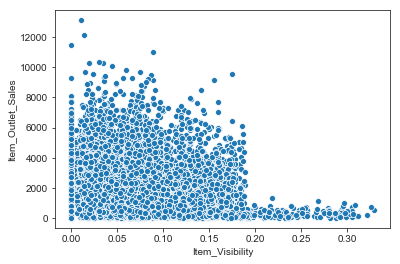

In [51]:
# Item_Visbility Vs Item_Outlet_Sales
sns.scatterplot(train_split['Item_Visibility'], train_split['Item_Outlet_Sales'])

Observation:
- Need further Analysis for Item_Visiblity

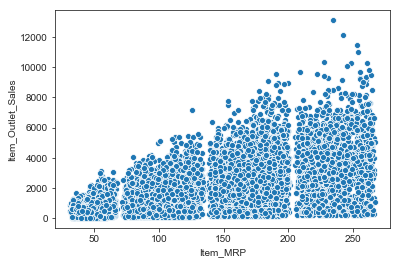

In [52]:
# Item_MRP Vs Item_Outlet_Sales
sns.scatterplot(train_split['Item_MRP'], train_split['Item_Outlet_Sales'])

Observation: 
- There are Four types of Segments in Item Price.

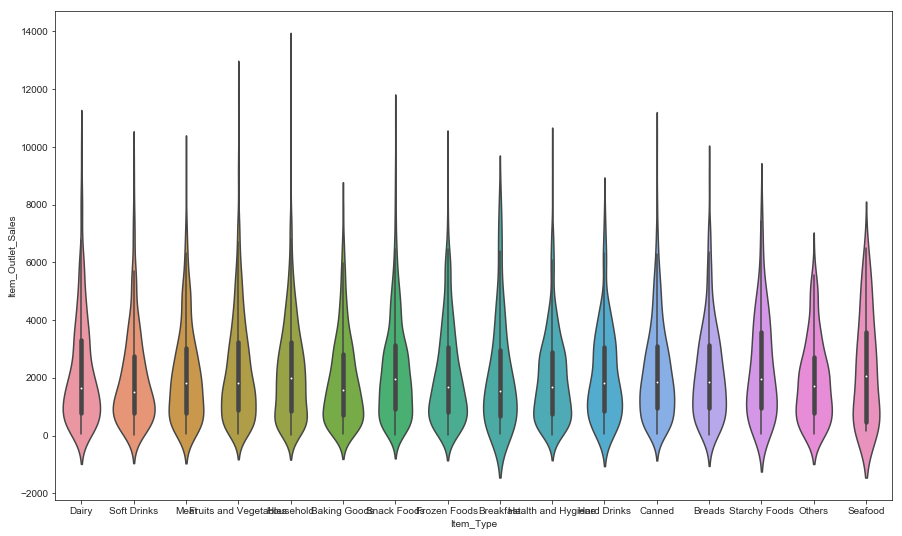

In [53]:
# Item_Type Vs Item_Outlet_Sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.violinplot(train_split['Item_Type'], train_split['Item_Outlet_Sales'])

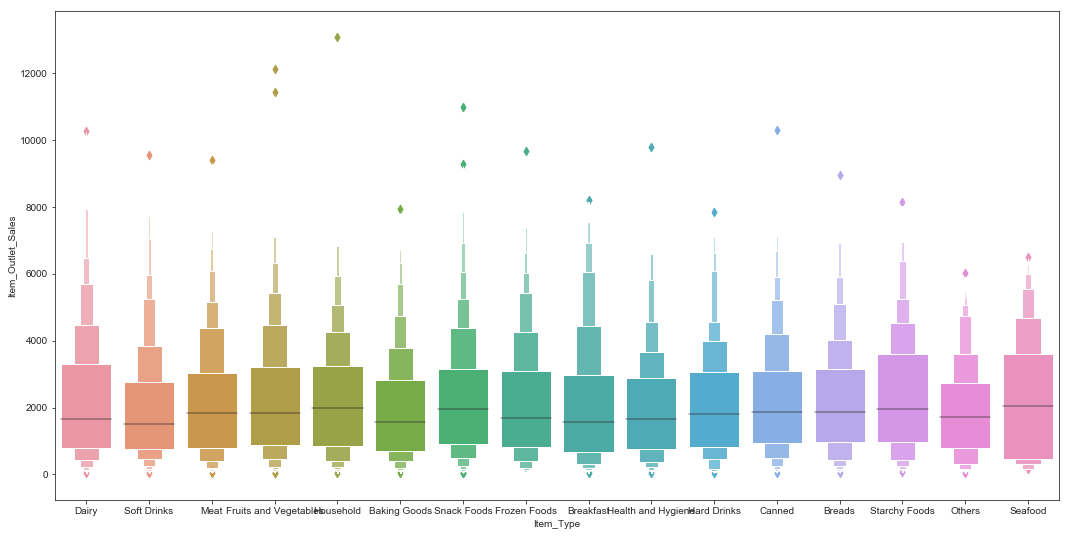

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(18,9)
sns.boxenplot(train_split['Item_Type'], train_split['Item_Outlet_Sales'])

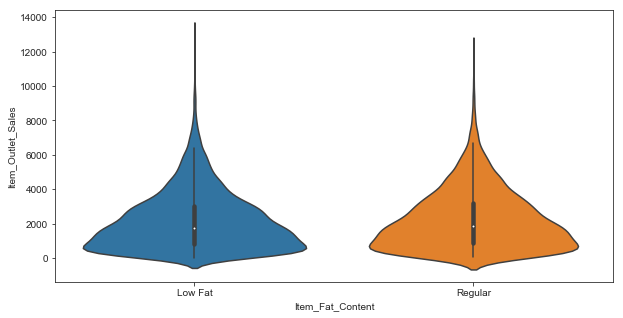

In [55]:
# Item_Fat_Content Vs Item_Outlet_Sales
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(train_split['Item_Fat_Content'], train_split['Item_Outlet_Sales'])

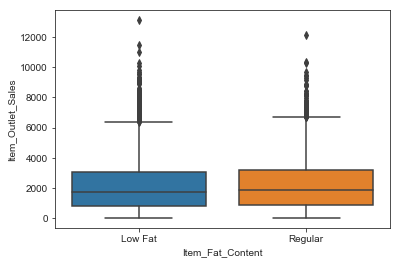

In [56]:
sns.boxplot(train_split['Item_Fat_Content'], train_split['Item_Outlet_Sales'])

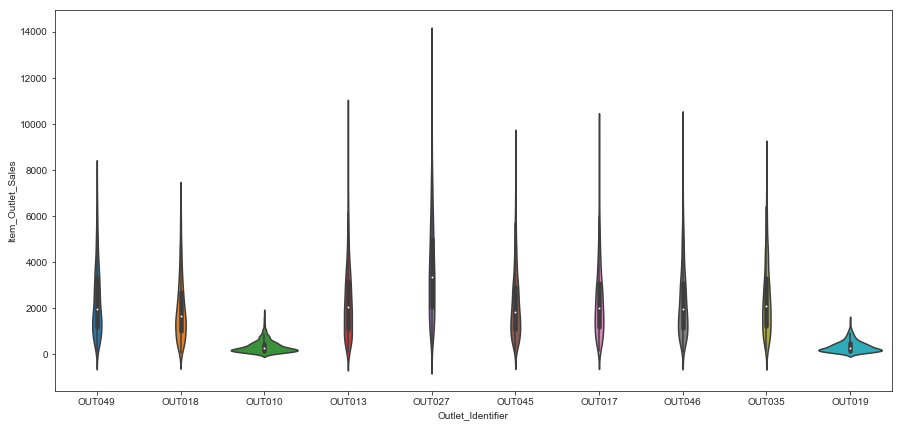

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
sns.violinplot(train_split['Outlet_Identifier'], train_set['Item_Outlet_Sales'])

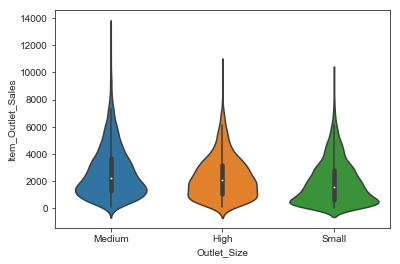

In [58]:
sns.violinplot(train_split['Outlet_Size'], train_split['Item_Outlet_Sales'])

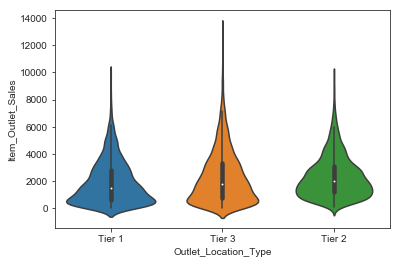

In [59]:
sns.violinplot(train_split['Outlet_Location_Type'], train_split['Item_Outlet_Sales'])

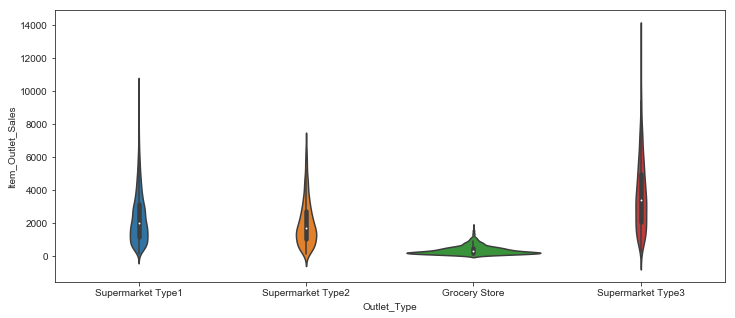

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.violinplot(train_split['Outlet_Type'], train_split['Item_Outlet_Sales'])

# Missing Value Treatment

In [61]:
# Observe the Missing values in Dataset
combine_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [62]:
#train[train["Electrical"].isnull()][null_columns]
#x = train_split[ train_split['Item_Weight'].isnull() ]['Item_Type'].head(20)
#x

In [63]:
#x.unique()

In [64]:
mean_Item_Weight=combine_set['Item_Weight'].mean()
combine_set['Item_Weight']=combine_set['Item_Weight'].fillna(mean_Item_Weight)
#train_split['Item_Weight'].fillna(train_split['Item_weight'].mean(), inplace=True)

In [65]:
median_Outlet_Size = combine_set['Outlet_Size'].mode()
combine_set['Outlet_Size']=combine_set['Outlet_Size'].fillna(median_Outlet_Size[0])

In [66]:
combine_set.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

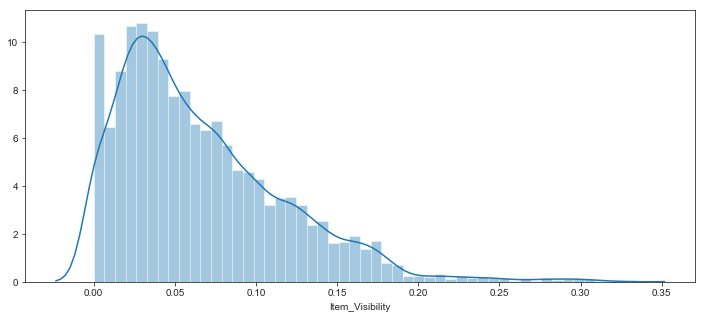

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.distplot(combine_set['Item_Visibility'])

In [68]:
mean_Item_Visibility = combine_set['Item_Visibility'].mean()
combine_set.loc[ combine_set['Item_Visibility'] == 0.0, 'Item_Visibility'] = mean_Item_Visibility

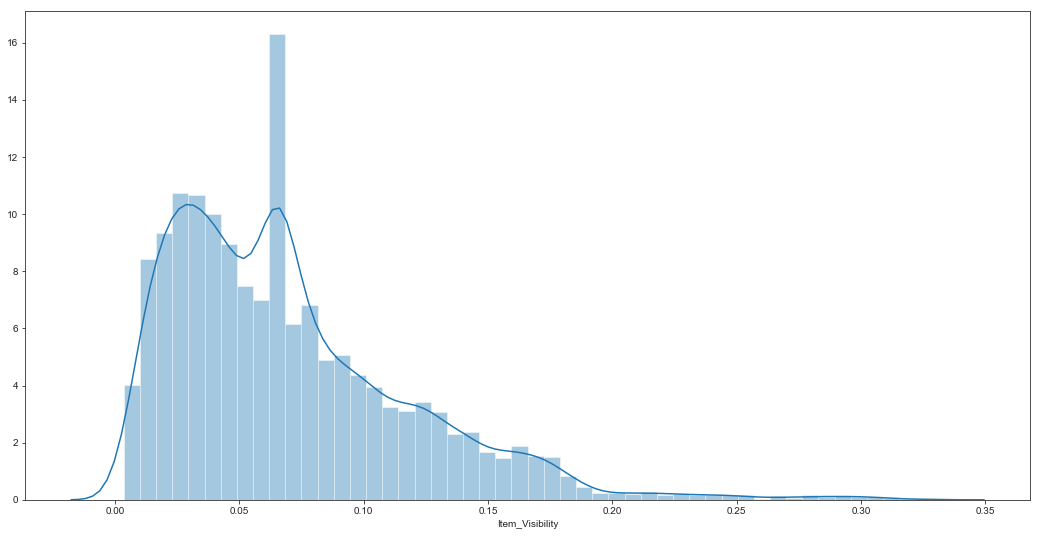

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(18,9)
sns.distplot(combine_set['Item_Visibility'])

# Feature Engineering

In [70]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [71]:
def func(x, l1, l2):
    """
    x = input value
    l1 = list of perishables
    l2 = list of non-perishables
    """    
    if x in l1:
        return 'perishable'
    elif x in l2:
        return 'non-perishable'
    else:
        return 'not_sure'

In [72]:
combine_set['Item_Type_new'] = combine_set['Item_Type'].apply(lambda x: func(x, perishable, non_perishable))

In [73]:
combine_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable


In [74]:
item_cat = combine_set['Item_Identifier'].str[:2].unique()
item_cat
#moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

array(['FD', 'DR', 'NC'], dtype=object)

In [75]:
combine_set.groupby(['Item_Type']).count()['Item_Identifier']

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
Name: Item_Identifier, dtype: int64

In [76]:
#df['Item_Identifier_substr']=df['Item_Identifier'].str.left(2) 
#pivot_df = df.pivot_table(index ='Item_Type', columns='Item_Identifier_substr', values='Item_Identifier',aggfunc='count')

#pivot_df

In [77]:
combine_set['Item_Category'] = combine_set['Item_Identifier'].str[:2]

In [78]:
pivot_df = combine_set.pivot_table(index ='Item_Type', columns='Item_Category', values='Item_Identifier',aggfunc='count')
pivot_df.replace(np.nan,0)

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0.0,1086.0,0.0
Breads,0.0,416.0,0.0
Breakfast,0.0,186.0,0.0
Canned,0.0,1084.0,0.0
Dairy,229.0,907.0,0.0
Frozen Foods,0.0,1426.0,0.0
Fruits and Vegetables,0.0,2013.0,0.0
Hard Drinks,362.0,0.0,0.0
Health and Hygiene,0.0,0.0,858.0


In [79]:
#combine_set.loc[combine_set['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
combine_set.loc[combine_set['Item_Category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'

In [80]:
combine_set['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [81]:
combine_set.loc[combine_set['Item_Category'] == 'NC', ['Item_Category','Item_Fat_Content'] ].head()

,Item_Category,Item_Fat_Content
4,NC,Non-Edible
16,NC,Non-Edible
22,NC,Non-Edible
25,NC,Non-Edible
31,NC,Non-Edible


In [82]:
# Years of Operation for Outlet
import datetime
now = datetime.datetime.now()

combine_set['Outlet_Years'] = now.year - combine_set['Outlet_Establishment_Year']

In [83]:
combine_set.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_new', 'Item_Category',
       'Outlet_Years'],
      dtype='object')

In [84]:
combine_set[['Outlet_Establishment_Year', 'Outlet_Years']].head()

,Outlet_Establishment_Year,Outlet_Years
0,1999,20
1,2009,10
2,1999,20
3,1998,21
4,1987,32


In [85]:
combine_set.groupby(['Outlet_Years']).count()['Outlet_Identifier']

Outlet_Years
10    1546
12    1543
15    1550
17    1548
20    1550
21     925
22    1550
32    1553
34    2439
Name: Outlet_Identifier, dtype: int64

In [86]:
combine_set.groupby(['Outlet_Size','Outlet_Years']).count()['Outlet_Identifier']

Outlet_Size  Outlet_Years
High         32              1553
Medium       10              1546
             12              1543
             17              1548
             20              1550
             21               925
             34              1559
Small        15              1550
             22              1550
             34               880
Name: Outlet_Identifier, dtype: int64

In [87]:
# Price per Unit Weight
combine_set['Price_Per_Unit_Weight'] = combine_set['Item_MRP'] / combine_set['Item_Weight']

In [88]:
combine_set[['Item_MRP','Item_Weight','Price_Per_Unit_Weight']].head()

,Item_MRP,Item_Weight,Price_Per_Unit_Weight
0,249.8092,9.30,26.861204
1,48.2692,5.92,8.153581
2,141.6180,17.50,8.092457
3,182.0950,19.20,9.484115
4,53.8614,8.93,6.031512


In [89]:
# creating new independent variable - Item_MRP_clusters
#combine_set['Item_Type_new'] = combine_set['Item_Type'].apply(lambda x: func(x, perishable, non_perishable))
def create_mrp_segments(item_mrp):
    if item_mrp < 69 :
        return "1st"
    elif item_mrp >= 69 and item_mrp < 136:
        return "2nd"
    elif item_mrp >= 136 and item_mrp < 203:
        return "3rd"
    else:
        return "4th"

In [90]:
combine_set['Item_MRP_Cluster'] = combine_set['Item_MRP'].apply(lambda x: create_mrp_segments(x))

In [91]:
combine_set[['Item_MRP','Item_MRP_Cluster']].head()

,Item_MRP,Item_MRP_Cluster
0,249.8092,4th
1,48.2692,1st
2,141.6180,3rd
3,182.0950,3rd
4,53.8614,1st


# Encoding Categorical Variable

In [92]:
combine_set['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [93]:
# Label Encoding for Outlet_Size
def encode_outlet_size(outlet_size):
    if outlet_size == 'Small':
        return 0
    elif outlet_size == 'Medium':
        return 1
    else:
        return 2

In [94]:
combine_set['Outlet_Size_Encoded'] = combine_set['Outlet_Size'].apply( lambda x: encode_outlet_size(x))

In [95]:
combine_set[['Outlet_Size','Outlet_Size_Encoded']].head()

,Outlet_Size,Outlet_Size_Encoded
0,Medium,1
1,Medium,1
2,Medium,1
3,Medium,1
4,High,2


In [96]:
# Label Encoding for Outlet_Location_Type
combine_set['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [97]:
def encode_outlet_location_type(outlet_loc_type):
    if outlet_loc_type == 'Tier 3':
        return 0
    elif outlet_loc_type == 'Tier 2':
        return 1
    else:
        return 2

In [98]:
combine_set['Outlet_Location_Type_Encoded'] = combine_set['Outlet_Location_Type'].apply( lambda x: encode_outlet_location_type(x))

In [99]:
combine_set[['Outlet_Location_Type', 'Outlet_Location_Type_Encoded']].head()

,Outlet_Location_Type,Outlet_Location_Type_Encoded
0,Tier 1,2
1,Tier 3,0
2,Tier 1,2
3,Tier 3,0
4,Tier 3,0


In [100]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 19 columns):
Item_Identifier                 14204 non-null object
Item_Weight                     14204 non-null float64
Item_Fat_Content                14204 non-null object
Item_Visibility                 14204 non-null float64
Item_Type                       14204 non-null object
Item_MRP                        14204 non-null float64
Outlet_Identifier               14204 non-null object
Outlet_Establishment_Year       14204 non-null int64
Outlet_Size                     14204 non-null object
Outlet_Location_Type            14204 non-null object
Outlet_Type                     14204 non-null object
Item_Outlet_Sales               8523 non-null float64
Item_Type_new                   14204 non-null object
Item_Category                   14204 non-null object
Outlet_Years                    14204 non-null int64
Price_Per_Unit_Weight           14204 non-null float64
Item_MRP_Cluster          

In [101]:
# Remove Categorical Variable after Encoding
combine_set.drop(['Outlet_Size','Outlet_Location_Type'], axis=1, inplace=True)

In [102]:
combine_set.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Type_new', 'Item_Category', 'Outlet_Years',
       'Price_Per_Unit_Weight', 'Item_MRP_Cluster', 'Outlet_Size_Encoded',
       'Outlet_Location_Type_Encoded'],
      dtype='object')

In [103]:
combine_set.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'], axis=1, inplace=True)

In [104]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
Item_Weight                     14204 non-null float64
Item_Fat_Content                14204 non-null object
Item_Visibility                 14204 non-null float64
Item_MRP                        14204 non-null float64
Outlet_Identifier               14204 non-null object
Outlet_Type                     14204 non-null object
Item_Outlet_Sales               8523 non-null float64
Item_Type_new                   14204 non-null object
Item_Category                   14204 non-null object
Outlet_Years                    14204 non-null int64
Price_Per_Unit_Weight           14204 non-null float64
Item_MRP_Cluster                14204 non-null object
Outlet_Size_Encoded             14204 non-null int64
Outlet_Location_Type_Encoded    14204 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.6+ MB


In [105]:
#pd.get_dummies(['Item_Fat_Content','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','Item_MRP_Cluster'])
dummies = pd.get_dummies(combine_set.select_dtypes(include=[object]), drop_first=True)

In [106]:
combine_set = pd.concat([combine_set, dummies], axis=1)

In [107]:
combine_set.drop(combine_set.select_dtypes(include=[object]), axis=1, inplace=True)

In [108]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 29 columns):
Item_Weight                      14204 non-null float64
Item_Visibility                  14204 non-null float64
Item_MRP                         14204 non-null float64
Item_Outlet_Sales                8523 non-null float64
Outlet_Years                     14204 non-null int64
Price_Per_Unit_Weight            14204 non-null float64
Outlet_Size_Encoded              14204 non-null int64
Outlet_Location_Type_Encoded     14204 non-null int64
Item_Fat_Content_Non-Edible      14204 non-null uint8
Item_Fat_Content_Regular         14204 non-null uint8
Outlet_Identifier_OUT013         14204 non-null uint8
Outlet_Identifier_OUT017         14204 non-null uint8
Outlet_Identifier_OUT018         14204 non-null uint8
Outlet_Identifier_OUT019         14204 non-null uint8
Outlet_Identifier_OUT027         14204 non-null uint8
Outlet_Identifier_OUT035         14204 non-null uint8
Outlet_Identifier_O

# Preprocessing the Data

In [109]:
# Removing Skewness
# log + 1 to avoid division by zero
combine_set['Item_Visibility'] = np.log(combine_set['Item_Visibility'] + 1 )
combine_set['Price_Per_Unit_Weight'] = np.log(combine_set['Price_Per_Unit_Weight'] + 1)

In [110]:
# Scaling Numeric Predictor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
scaler.fit_transform(combine_set)

array([[-0.82493872, -1.14788431,  1.75251118, ..., -0.69887111,
        -0.72967109,  2.21773157],
       [-1.62322365, -1.07611036, -1.4936965 , ..., -0.69887111,
        -0.72967109, -0.4509112 ],
       [ 1.11172885, -1.13203062,  0.00987397, ..., -0.69887111,
         1.37048051, -0.4509112 ],
       ...,
       [-0.65961344,  0.09620779, -0.35855788, ...,  1.430879  ,
        -0.72967109, -0.4509112 ],
       [ 0.59213511, -0.06389376,  1.18574722, ..., -0.69887111,
        -0.72967109,  2.21773157],
       [-0.77770293,  0.74369999, -0.98589388, ...,  1.430879  ,
        -0.72967109, -0.4509112 ]])

In [112]:
# Split Training and Validation Data
training_data = combine_set[0:training_set.shape[0]]
validation_data = combine_set[training_data.shape[0]+1:combine_set.shape[0]+1 ]
validation_data.shape

(5680, 29)

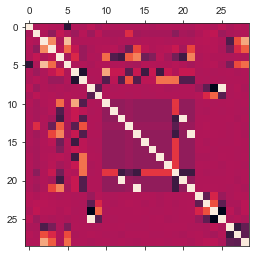

In [113]:
plt.matshow(training_data.corr())

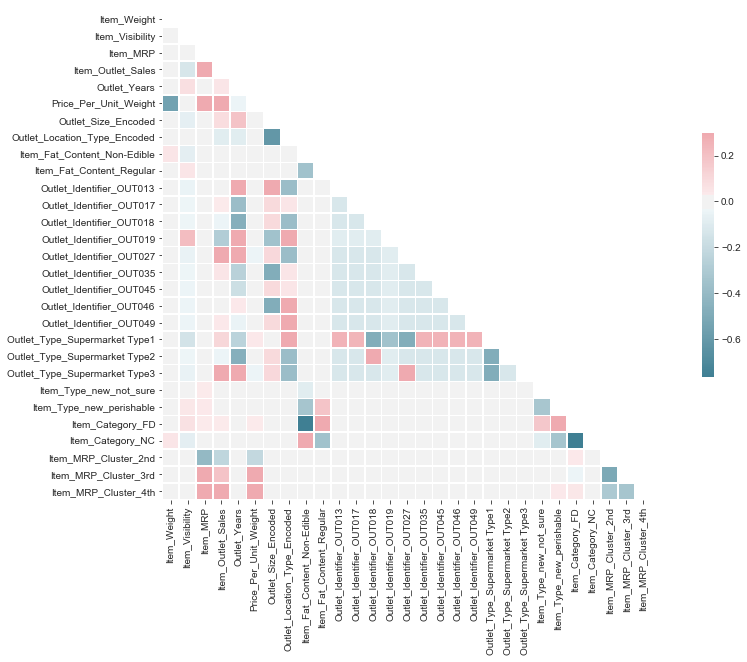

In [114]:
# Generate a mask for the upper triangle
mask = np.zeros_like(training_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(18,9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(training_data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model Building

In [115]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

In [116]:
# Predictors
y = training_data['Item_Outlet_Sales']
X = training_data.drop(['Item_Outlet_Sales'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [117]:
# Fit Training Data to Model
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
linear_reg_model.intercept_

-1901.1141647144982

In [119]:
pd.DataFrame(linear_reg_model.coef_, X_train.columns, columns=['Coefficient'])

,Coefficient
Item_Weight,-7.791331
Item_Visibility,-479.076888
Item_MRP,16.481501
Outlet_Years,10.570284
Price_Per_Unit_Weight,-148.234403
Outlet_Size_Encoded,121.868965
Outlet_Location_Type_Encoded,272.702575
Item_Fat_Content_Non-Edible,0.213616
Item_Fat_Content_Regular,84.022079
Outlet_Identifier_OUT013,240.236264


# Prediction from our Model

In [121]:
predictions = linear_reg_model.predict(X_test)

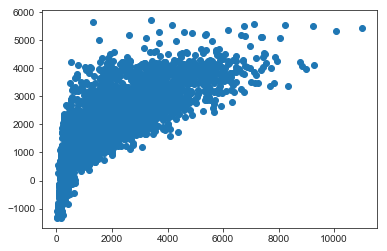

In [122]:
plt.scatter(y_test, predictions)

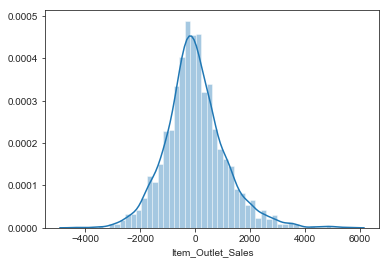

In [123]:
# Residual Histogram
sns.distplot((y_test-predictions),bins=50);

# Regression Evalution Metrics

In [128]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
print("MAE : ", mae(y_test, predictions))
print("MSE : ", mse(y_test, predictions))
print("RMSE : ", np.sqrt(mse(y_test, predictions)))

MAE :  822.0164948092064
MSE :  1214276.653010827
RMSE :  1101.9422185445237
